<a href="https://colab.research.google.com/github/CaioLSouza/my_portfolio_en/blob/main/Airbnb_Los_Angeles_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Airbnb data -- *Los Angeles*


Airbnb is an American company that offers hotel and accommodation services around the world, even without owning any hotel!

The company's function is to connect, through a space and digital market, guests who want to rent their properties with people who are looking for somewhere to stay. Thus, Airbnb's revenue comes from commissions from these sales.

One of the company's initiatives is to make its data available to the general public, available on the [Inside Airbnb](http://insideairbnb.com/get-the-data/) website. In this analysis, we'll use them to do an exploratory analysis of *Los Angeles* Airbnb data.

Los Angeles is among the most famous cities on the planet. It's where Hollywood is located, the Walk of Fame, Venice Beach, the world's most famous cinemas and many other tourist attractions. Among the best known neighborhoods in the city are Beverly Hills, Malibu, Santa Monica and Chinatown.

### **Main points of exploratory data analysis**


Exploratory analysis is essential to learn more about the data, the types of variables involved, how they relate to each other, among other things.

In this project, I will seek to understand the following aspects of our dataset:



* What are our variables and their different types?
* How are the variables distributed across the data set?
* How many missing values ​​and *outliers* do we have in the *dataset*?
* How to deal with these missing values ​​and found *outliers*?
* To what degree and which variables are correlated?


In addition, I will answer some basic and important questions of the problem, such as:


* What are the most expensive properties in our *dataset*?
* What types of properties are most sought after?

Having explained the scope and main points of our analysis, let's get the necessary data and packages.


### **Data gathering**

All the data we will use is available at [Inside Airbnb](http://insideairbnb.com/get-the-data/).


Los Angeles data is available [here](http://data.insideairbnb.com/united-states/ca/los-angeles/2021-12-05/visualisations/listings.csv).

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style()

In [36]:
from matplotlib.blocking_input import BlockingMouseInput
# color setting
BLUE = "#003F5c" 
GRAY = "#9E9E9E"
GRAY_TEXT = "#515151"

In [2]:
#tranform csv file
df = pd.read_csv('https://raw.githubusercontent.com/CaioLSouza/datasets/main/dados_los_angeles.csv')

In [3]:
# show columns of the dataset
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

### **Features dictionary**

In order to have a general and descriptive view of our data, it is very important to build a dictionary of parameters.

* `id` - Unique property identification number
* `name` - Property name/description
* `host_id` - Property owner identification number
* `host_name` - Name of the property owner
* `neighbourhood_group` - Tells if the property is in Los Angeles or in a nearby city (district)
* `neighbourhood` - Name of the neighborhood
* `latitude` - Latitude of the property
* `longitude` - Longitude of the property
* `room_type` - Type of room
* `price` - Price of the property
* `minimum_nights` - Minimum number of nights to stay
* `number_of_reviews` - ​​Number of property reviews
* `last_review` - Last review of the property
* `reviews_per_month` - Number of reviews per month
* `calculated_host_listings_count` - Number of hosts from the same host
* `availability_365` - Number of days available compared to 365
* `number_of_reviews_ltm` - Number of reviews in the last twelve months
* `license` - License number.


Now, let's see the first entries of our *dataset*.

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,2016-05-15,0.02,1,226,0,NaN
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,3008,Chas.,City of Los Angeles,Hollywood,34.09625,-118.34605,Private room,89,30,33,2021-11-01,0.69,3,327,5,NaN
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00440,-118.48095,Private room,167,7,21,2019-12-27,0.35,2,359,0,228269
3,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,Other Cities,Bellflower,33.87490,-118.11515,Entire home/apt,50,30,0,NaN,NaN,1,0,0,NaN
4,3021,Hollywood Hills Zen Modern style Apt/Guesthouse,3415,Nataraj,City of Los Angeles,Hollywood Hills West,34.11160,-118.38223,Entire home/apt,118,31,23,2018-10-31,0.23,4,308,0,NaN


### **How ​​many variables and how many entries does our dataset have? What are the types of variables?**

In [5]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of features: {df.shape[1]}')

Number of rows: 33329
Number of features: 18


In [6]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

As can be seen, we have 11 numerical features and 7 categorical features.

### **What percentage of values ​​are missing from the *dataset*?**

One of the complications we have to deal with in the data science is missing values, specially when we pretend to build a machine learning model, for example (it's not our case here).

Thus, we need to study them already in the exploratory analysis.

In [7]:
# total missing values by variable
df.isnull().sum().sort_values(ascending=False)

license                           24925
reviews_per_month                  8010
last_review                        8010
host_name                             7
name                                  2
minimum_nights                        0
number_of_reviews_ltm                 0
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
id                                    0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
price                                 0
dtype: int64

In [8]:
# percentage of missing values 
df.isnull().sum().sort_values(ascending=False) / df.shape[0]

license                           0.747847
reviews_per_month                 0.240331
last_review                       0.240331
host_name                         0.000210
name                              0.000060
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

* The variable `license` has a huge amount of missing data, almost 75%.

* `reviews_per_month` and `last_review` have a smaller but still significant amount.

* `host_name` has a very small and negligible amount of them.

### **Visualizing the distribution of variables**

We can get a visualization of the distribution and frequency of the data from the histograms.

In [9]:
num_var = []
for col in df.columns:
  if df[col].dtype == int or df[col].dtype == float:
    num_var.append(col)

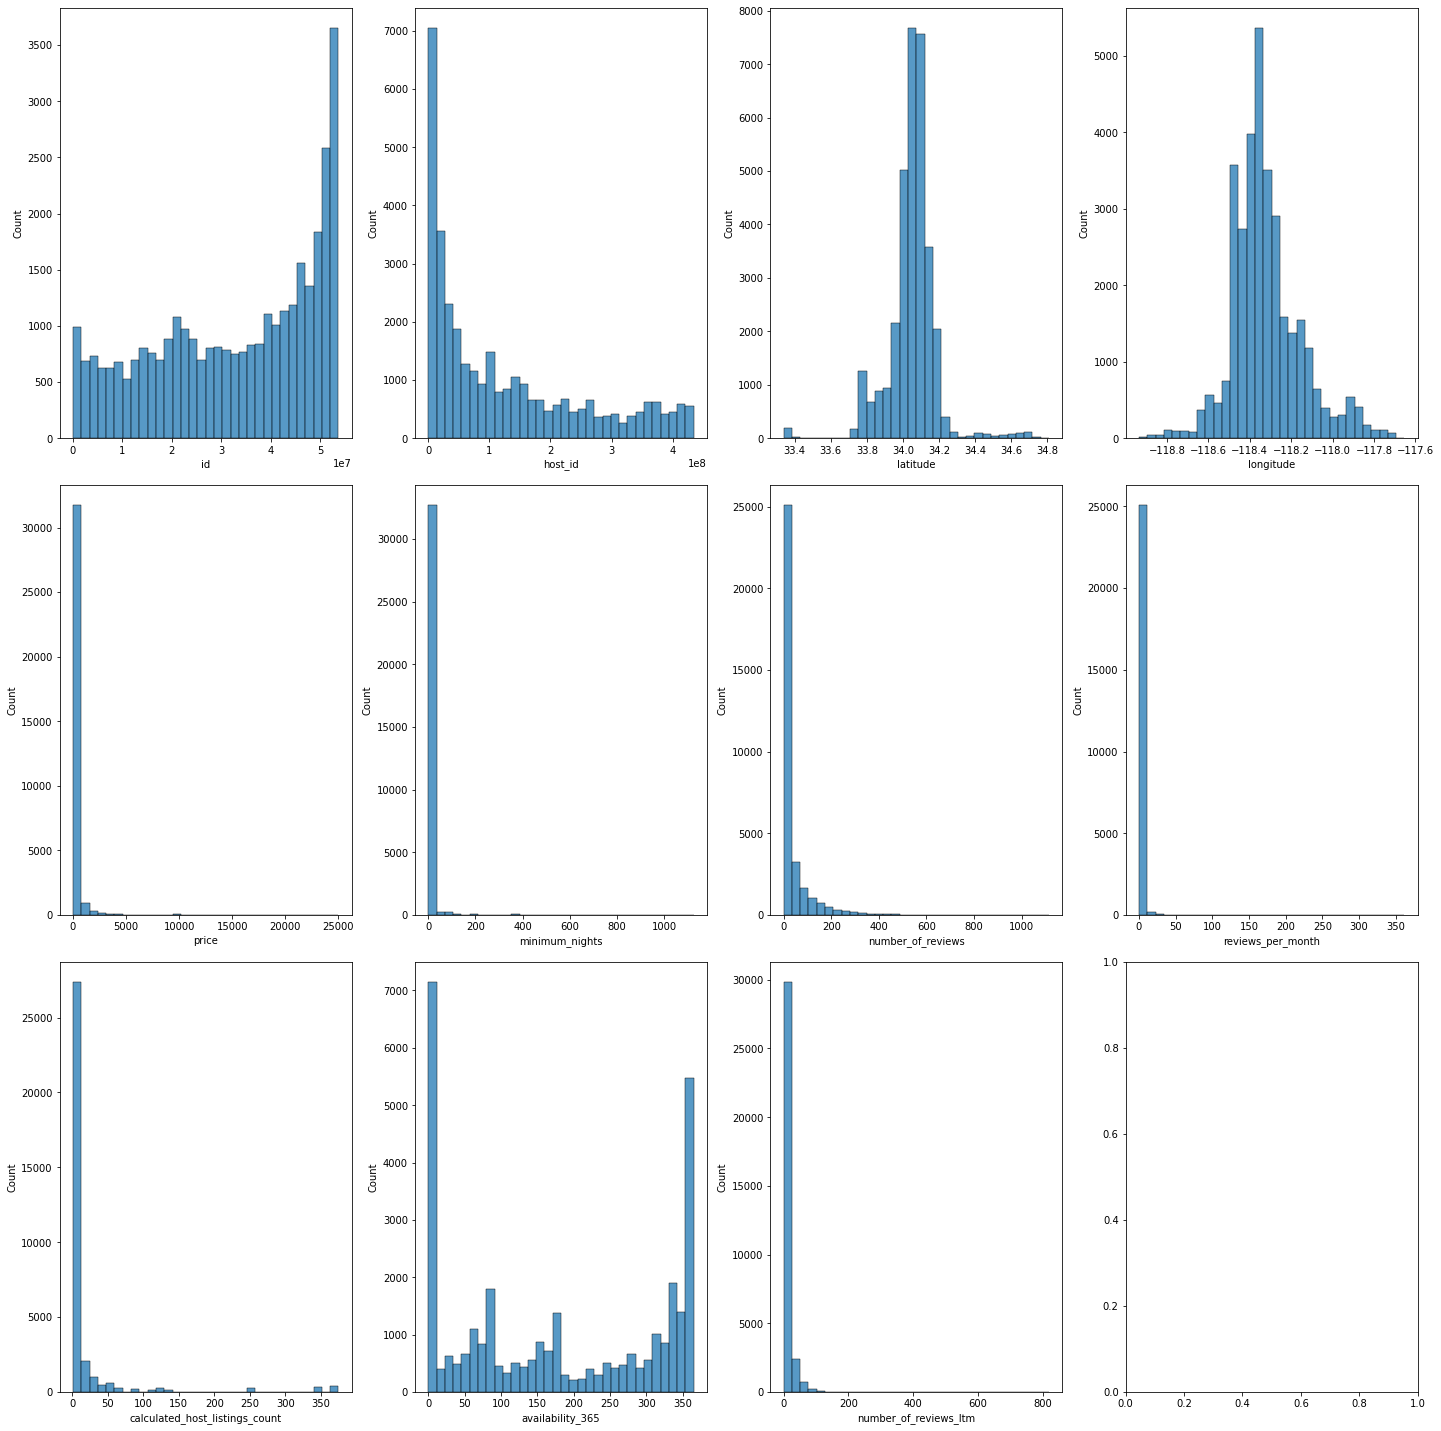

In [71]:
sns.set_style()

fig, ax = plt.subplots(figsize=(20, 20), nrows=3, ncols=4)
fig.subplots_adjust(hspace=1, wspace=1)


idx = 0
for col in num_var:
  idx += 1
  plt.subplot(3, 4, idx)
  sns.histplot(data=df, x=col, bins=32)
plt.tight_layout()

As we can see, ``latitude`` and ``longitude`` have a distribution similar to a normal distribution.

Also, we have a lot of variables in which there is a huge concentration on the begining of the distribution, and almost nothing on the end of the distribution. This can be the consequence of a Pareto distribution or an effect of outliers.

### **Statistical summary, outliers and boxplots**

Histograms allow us to visualize the presence of another problem for data analysis and statistical methods in general: the *outliers*.

Notice that in the `price`, `minimum_nights` and `reviews_per_month` variables, for example, we have values ​​that are very far from most of the other values ​​that the variable presents.

Furthermore, we can confirm our hypothesis through two other methods:


* statistical summary `describe()`
* bloxplots

In [11]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.332900e+04,3.332900e+04,33329.000000,33329.000000,33329.000000,33329.000000,33329.000000,25319.000000,33329.000000,33329.000000,33329.000000
mean,3.281692e+07,1.243954e+08,34.050177,-118.318861,262.710792,20.004591,34.327613,1.779979,18.134087,179.225959,7.665937
std,1.650642e+07,1.275015e+08,0.134601,0.167924,726.306533,32.951251,69.465095,4.362952,58.415804,140.735067,17.069025
min,1.090000e+02,5.210000e+02,33.338480,-118.934830,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.941244e+07,1.809645e+07,33.997040,-118.423560,79.000000,2.000000,1.000000,0.240000,1.000000,37.000000,0.000000
50%,3.599970e+07,7.432902e+07,34.060560,-118.345350,125.000000,30.000000,6.000000,0.810000,2.000000,167.000000,1.000000
75%,4.835240e+07,2.033166e+08,34.105280,-118.251490,225.000000,30.000000,34.000000,2.280000,7.000000,334.000000,6.000000
max,5.368638e+07,4.345829e+08,34.811130,-117.653400,25000.000000,1124.000000,1115.000000,362.000000,375.000000,365.000000,819.000000


Here we see again the presence of outliers.

In the `price` column, the average is at 262, while the maximum value is 25000!

Also, the minimum value is 0, which makes no logical sense for it to happen. We are probably dealing with some kind of error in the composition of the data.

In `minimum_nights`, 75% of the values ​​are below 30, but the maximum value is 1124.

#### Boxplots

In [72]:
def boxplot(feature):
  fig, ax = plt.subplots(figsize=(6,4), sharex=True)
  sns.boxplot(y=df[feature], showmeans=True, ax=ax)
  ax.set_title(f"Boxplot - {feature}",  fontsize=16, color=GRAY_TEXT)
  plt.tight_layout()

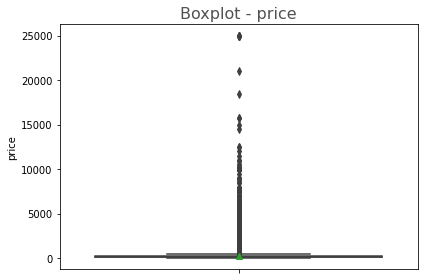

In [73]:
boxplot('price')

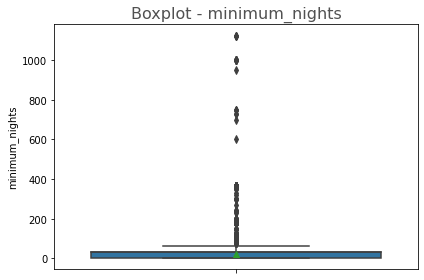

In [74]:
boxplot('minimum_nights')

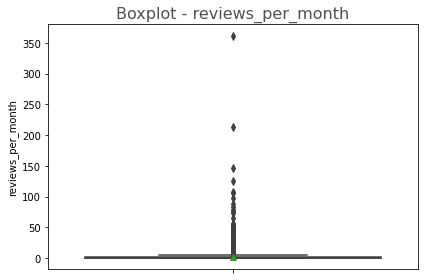

In [75]:
boxplot('reviews_per_month')

In all these variables, the presence of outliers is significant that the boxplots almost disappear.

### **Correlation**

Correlation is a measure of the relation between two variables. Here, we'll use the *pearson correlation* which is a measure of the linear relation. If it is equals to 1, then there is a perfect linear positive relation; if it is equals to -1, then there is a perfect linear negative relation; if it is equals to 0, however, then there is no linear relation for two given variables.

In [16]:
corr = df.drop(['id', 'host_id'], axis=1).corr()

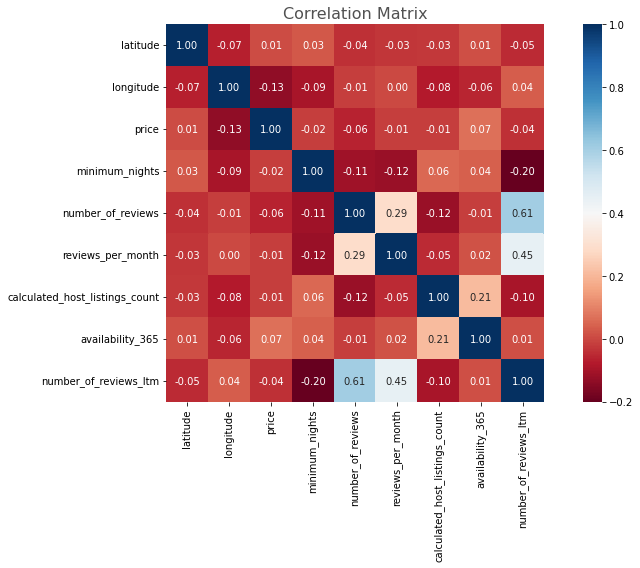

In [69]:
# criar um heatmap a partir da matriz de correlação
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Correlation Matrix", fontsize=16, color=GRAY_TEXT)
sns.heatmap(corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True)
plt.tight_layout()

Variables with the highest positive correlation:

* `reviews_per_month`, `number_of_reviews`
and `number_of_reviews_ltm`

* `availability_365` and `calculated_host_listings_count`

Variables with the highest negative correlation:

* `number_of_reviews_ltm` and `minimum_nights`

* `minimum_nights` and `longitude`


The strongest correlations are very obvious from an intuitive point of view.

### **What type of property is the most rented?**


The `room_type` column gives us the types of properties available on Airbnb. Let's sort them in descending order to see which are the most rented types.

In [18]:
df['room_type'].value_counts()

Entire home/apt    22741
Private room        9702
Shared room          775
Hotel room           111
Name: room_type, dtype: int64

In [19]:
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.682319
Private room       0.291098
Shared room        0.023253
Hotel room         0.003330
Name: room_type, dtype: float64

68% of the properties are entire homes or apartments.

### **What is the relationship between price and room type?**

The `groupby()` function allows us to group one variable from another.

In [20]:
df.groupby('room_type').price.mean().sort_values(ascending=False)

room_type
Hotel room         481.396396
Entire home/apt    325.711622
Private room       127.538033
Shared room         74.930323
Name: price, dtype: float64

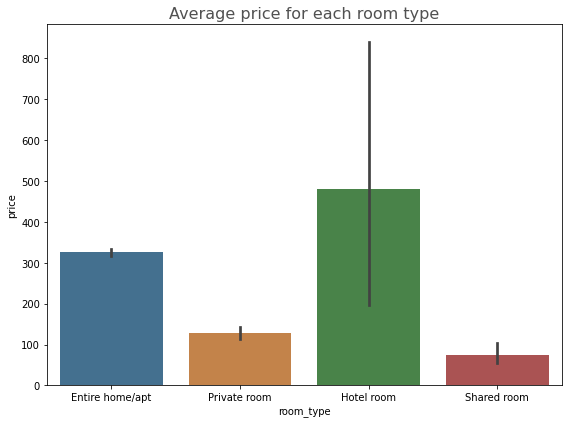

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df, x='room_type', y='price', saturation=0.5)
ax.set_title("Average price for each room type", fontsize=16, color=GRAY_TEXT)

plt.tight_layout()

As we can see, the hotel rooms are the most expensive type of room, followed by the entire home or apartment. The bar chart also indicates high uncertainty about average price for hotel rooms. This fact comes from the small number of observations of this group (111 as can be seen).

In [22]:
df['room_type'].value_counts()

Entire home/apt    22741
Private room        9702
Shared room          775
Hotel room           111
Name: room_type, dtype: int64

### **What is the most expensive location in the *dataset***


In this case, we want to group and order the `neighbourhood` variable from the `price` variable.

In [23]:
df.groupby('neighbourhood').price.mean().sort_values(ascending=False)

neighbourhood
Rolling Hills                2602.833333
Bel-Air                      2540.681818
Beverly Crest                1711.806452
Angeles Crest                1661.000000
Malibu                       1547.832817
                                ...     
Rancho Dominguez               52.500000
Desert View Highlands          40.000000
Northwest Antelope Valley      37.000000
Watts                          33.600000
Cudahy                         14.000000
Name: price, Length: 266, dtype: float64

Would it be true to say that *Rolling Hills* is the most expensive neighborhood in Los Angeles? The answer is not necessarily.

We are only dealing with a sample, not the entire population. Therefore, we must exercise caution when trying to infer a statement about the population from sample data.

Our sample could be biased or contain insufficient data.

In [24]:
df[df.neighbourhood == 'Elizabeth Lake'].shape

(1, 18)

The locality *Elizabeth Lake* is an example of this. She only owns one property, which is enough to place her among the 4 most expensive locations in Los Angeles, by *dataset*.


Now let's take a look at how prices are distributed in the most expensive place, looking especially at the extremes.

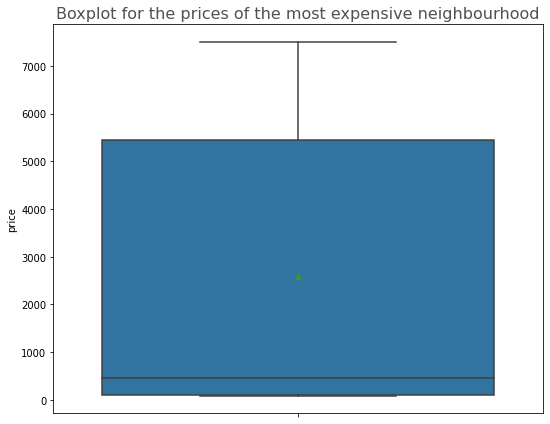

In [67]:
fig, ax = plt.subplots(figsize=(8, 6), sharex=True)
ax.set_title('Boxplot for the prices of the most expensive neighbourhood', fontsize=16, color=GRAY_TEXT)
sns.boxplot(y=df[df.neighbourhood == 'Rolling Hills'].price, showmeans=True, ax=ax)
plt.tight_layout()

### **Neighbourhoods Groups**

The variable ``neighbourhood_group`` shows three types of neighbourhood: City of Los Angeles, other cities and unincorporated areas.

In [26]:
df['neighbourhood_group'].value_counts()

City of Los Angeles     18210
Other Cities            12289
Unincorporated Areas     2830
Name: neighbourhood_group, dtype: int64

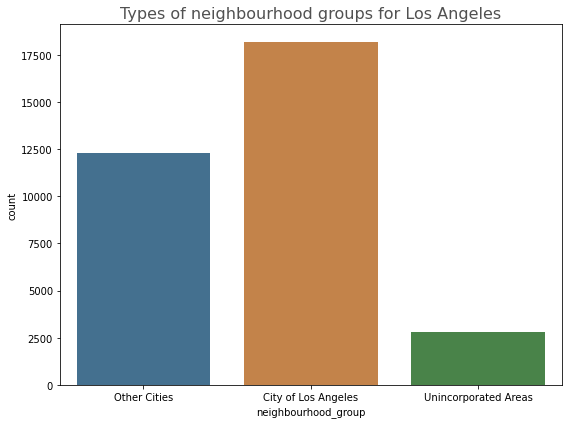

In [66]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Types of neighbourhood groups for Los Angeles', fontsize=16, color=GRAY_TEXT)
sns.countplot(data=df, x='neighbourhood_group', saturation=0.5)
plt.tight_layout()

The majority of homes are located in the City of Los Angeles.

Let's group again the variable by the price, but now we will use the ``neighbourhood_group``.

In [28]:
df.groupby('neighbourhood_group').price.mean().sort_values(ascending=False)

neighbourhood_group
Other Cities            272.901294
City of Los Angeles     262.435091
Unincorporated Areas    220.233569
Name: price, dtype: float64

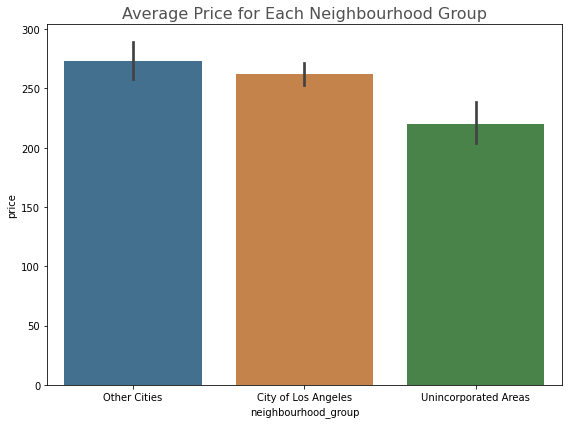

In [65]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df, x='neighbourhood_group', y='price', saturation=0.5)
ax.set_title("Average Price for Each Neighbourhood Group", fontsize=16, color=GRAY_TEXT)

plt.tight_layout()

On average, the most expensive homes are in the "Other Cities" category.

### **Creating "Maps" with Latitude and Longitude**

The presence of longitude and latitude in the dataset allow us to build "maps". For example, we can create a map that shows the location of the properties, discriminating them by their neighbourhood group (City of Los Angeles, Other Cities, Unincorporated Areas).


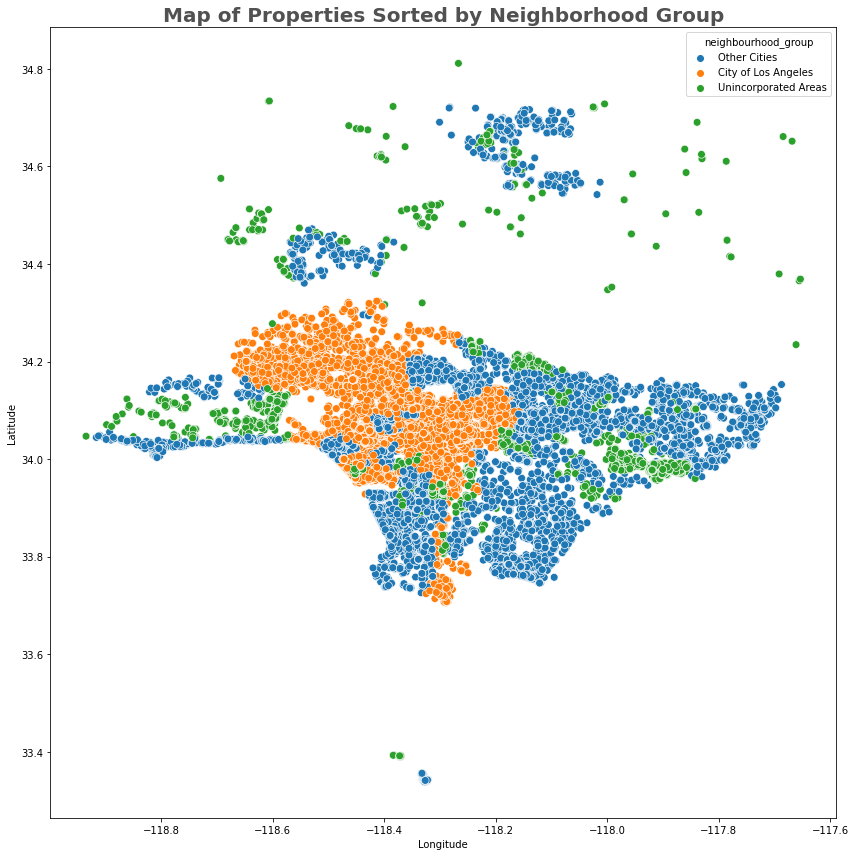

In [41]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=df, x='longitude', y= 'latitude', hue='neighbourhood_group', legend='full', s=60)

plt.xlabel('Longitude')
plt.ylabel("Latitude")

ax.set_title('Map of Properties Sorted by Neighborhood Group', fontsize=20, color=GRAY_TEXT, weight='bold')

plt.tight_layout()

Seems like the last map only shows blue dots. This fact happens because the scale of the colors are affected by the outliers. So let's remove them to have a better visualization.

### **Removing Outliers of the Price Variable***


The IQR is a statistical measure calculated from the first (Q1) and third (Q3) quartiles (values ​​that divide the data set into 25% and 75%, respectively).

## IQR = Q3 - Q1

From it, we calculate lower and upper limits. Any value below or above them is classified as an *outlier*

In [52]:
# IQR for price
iqr_price = df.price.quantile(0.75) - df.price.quantile(0.25)
print(f'IQR for price is {iqr_price}')

IQR for price is 146.0


In [53]:
# compute the outliers boundaries
lim_inf_price = df.price.quantile(0.25) - 1.5 * iqr_price
lim_sup_price = df.price.quantile(0.75) + 1.5 * iqr_price

print(f' Values below {lim_inf_price} are outliers')
print(f'Values above {lim_sup_price} are outliers')

 Values below -140.0 are outliers
Values above 444.0 are outliers


Although the lower bound of `price` is negative, we still need to exclude values ​​equal to zero.

In [54]:
# remove outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 444].index, axis = 0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis = 0, inplace=True)

#### Map without outliers

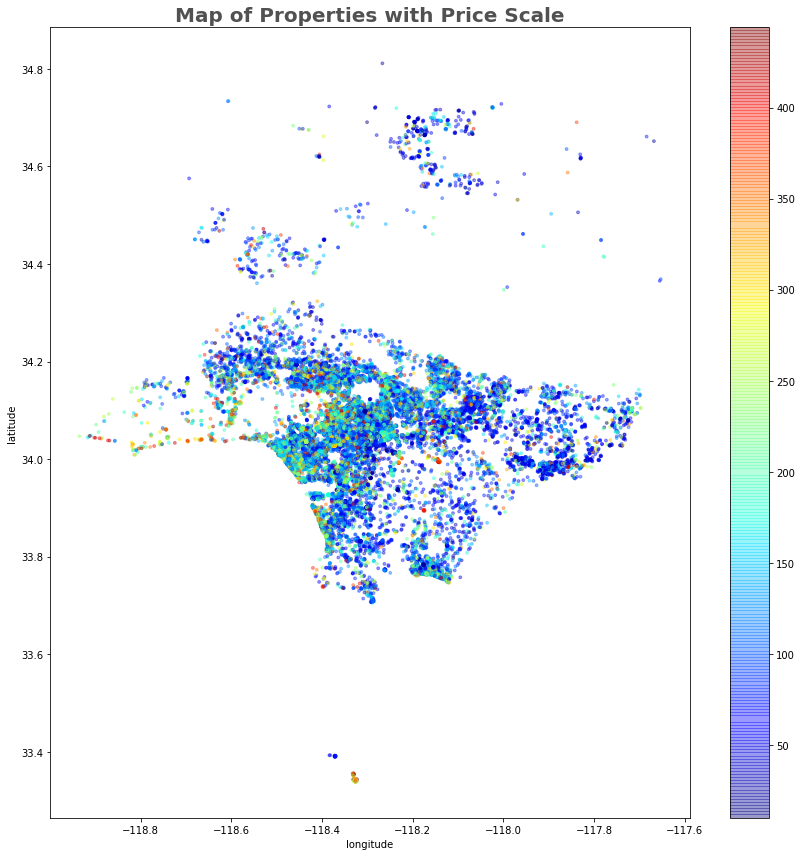

In [62]:
fig, ax = plt.subplots(figsize=(12, 12))

df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], 
        s=8,  cmap= plt.get_cmap('jet'), ax=ax)

ax.set_title('Map of Properties with Price Scale', fontsize=20, color=GRAY_TEXT, weight='bold')

plt.tight_layout()

Now we have a much better visualization, where we can see clearly the presence of yellow and red dots.

As we might have expected, the most expensive houses are usually clusterd together.

## **Conclusions**

In this project -- which is still an initial data analysis -- we came into contact with a relatively balanced *dataset* between categorical and numeric variables.

We also had a considerable presence of missing data in some variables. Regarding the *outliers*, we were able to clean them satisfactorily for the variable price through statistical procedures for a better visualization of plots.

Additionally, we investigated the correlation between the variables. We didn't find anything very exciting in this phase, as they usually appeared on attributes that were already clearly related to each other.

Futhermore, we were able to answer some questions about the dataset, like "what is the most frequent location or room type?", "what is the most expensive room type?", among others.

We also analyze the relationship between neighborhood and price. We concluded that our sample dataset was not sufficient to make a statement about the entire city of *Los Angeles*.

Finally, we built two maps connecting location and nighborhood and location and price.